<a href="https://colab.research.google.com/github/alvitay/BERT-Article-Categorization/blob/main/Transformers_Articles_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Introduction to Transformers: BERT - Article Categorization</center></h1>

## Problem Statement

### Business Context

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of articles spanning diverse topics. Ensuring that the right articles reaches the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, media organizations encounter challenges such as:
- Information Overload: The sheer volume of articles makes manual categorization impractical.
- Timeliness: Delays in categorizing articles can result in outdated or misplaced content.
- User Engagement: Providing personalized and relevant content is vital for sustaining user interest.

### Problem Definition

InfoWorld, a prominent player in the media landscape, faces these challenges on a monumental scale. With a vast repository of articles covering global affairs, entertainment, politics, and more, the need for an advanced and automated system to categorize articles has become increasingly evident. The manual efforts required for categorizing such a diverse range of articles are substantial, often leading to delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on InfoWorld's data team, the task is to analyze articles and construct a predictive model for categorizing them. The goal is to optimize the categorization process, ensuring timely and personalized delivery. Leveraging advanced machine learning techniques, the initiative aims to address technical challenges and pave the way for a seamless intersection of technology and media.

### Data Dictionary

- Date published: The date when the article or content was officially released or made public.
- Category: Categorization indicating the broad topic or subject of the content.
- Section: Subdivision within the publication that helps classify the content further.
- Headline: Brief and catchy title summarizing the main idea or topic of the content.
- Description: A short summary or overview of the content, providing additional context.
- Keywords: Relevant keywords or tags associated with the content for search engine optimization.
- Article text: The main body of the article or content containing detailed information and context.

## Importing the necessary libraries

In [ ]:
# installing the libraries to load transformers models
!pip install transformers -q

In [ ]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report

# Import TensorFlow for deep learning tasks
import tensorflow as tf

# importing library for text preprocessing
import re

# Import modules from the Hugging Face transformers library
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
# Set the seed for the TensorFlow random number generator to ensure reproducibility
tf.random.set_seed(42)

## Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
df = pd.read_csv('/content/drive/MyDrive/BERT/Articles.csv')

In [ ]:
# creating a copy of the dataset
data = df.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

,Date published,Category,Section,Headline,Description,Keywords,Article text
0,2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","(CNN)Right now, there's a shortage of truck d..."
1,2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",(CNN)Working in a factory or warehouse can me...
2,2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...","(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,2022-03-15 09:57:36,business,investing,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...","New York (CNN Business)For many years, the wor..."
4,2022-03-15 11:27:02,business,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",The European Union formally approved on Tuesda...


In [ ]:
# checking an article
data.loc[3, 'Article text']

'New York (CNN Business)For many years, the world\'s most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.But given that Russia is no longer a market that Westerners can access following the invasion of Ukraine, it might be time for investors to stop lumping all of the emerging markets together."The BRICS had their day in the sun and that has faded," said Eric Winograd, senior economist at AllianceBernstein.Several major US index providers have removed Russian stocks from indexes at a price of "zero" or "effectively zero." Trading shares of several leading US-listed Russian companies, such as search engine Yandex and telecom MTS, have been halted. And the Moscow Stock Exchange has been closed since February 25, the day after the invasion.Russia could default on its debt within days"The idea that a country as large as Russia can be removed from indexes is a big deal," Winograd said.Read MoreIt seems likely that Russia will not be inc

### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(4076, 7)

* The data comprises of ~4k articles

### Checking for missing values

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Date published,0
Category,0
Section,0
Headline,0
Description,0
Keywords,0
Article text,0


- There are no missing values in the data

### Checking the statistical summary

In [ ]:
data.describe()

,Date published,Category,Section,Headline,Description,Keywords,Article text
count,4076,4076,4076,4076,4076,4076,4076
unique,4076,6,37,4071,4069,4071,4075
top,2021-07-15 02:46:59,sport,sport,Ukrainian opposition demand investigation into...,Austria's Chancellor Sebastian Kurz said in a ...,"europe, Ukrainian opposition demand investigat...","(CNN)It has been delayed by a year, but that ..."
freq,1,2176,1088,2,2,2,2


- There seem to a large number of articles from the sports category

## Exploratory Data Analysis (EDA)


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of article categories

<ipython-input-12-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


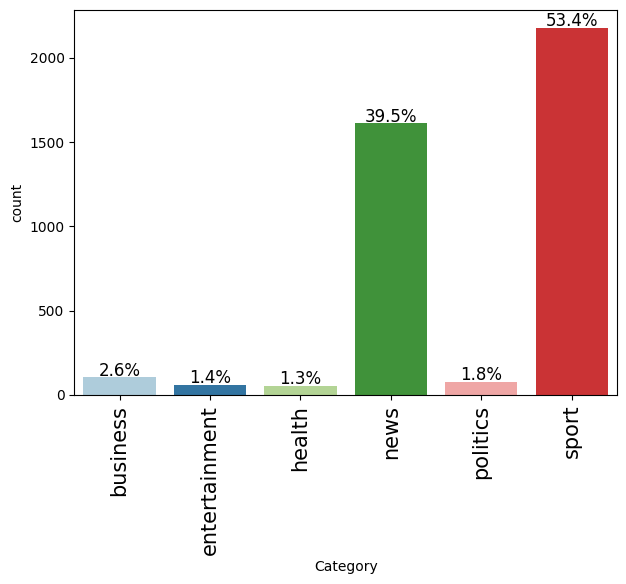

In [ ]:
labeled_barplot(data, "Category", perc=True)

- Majority of the articles in the data are sports articles (53%), followed by news articles (~40%)

#### Distribution of section

<ipython-input-12-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


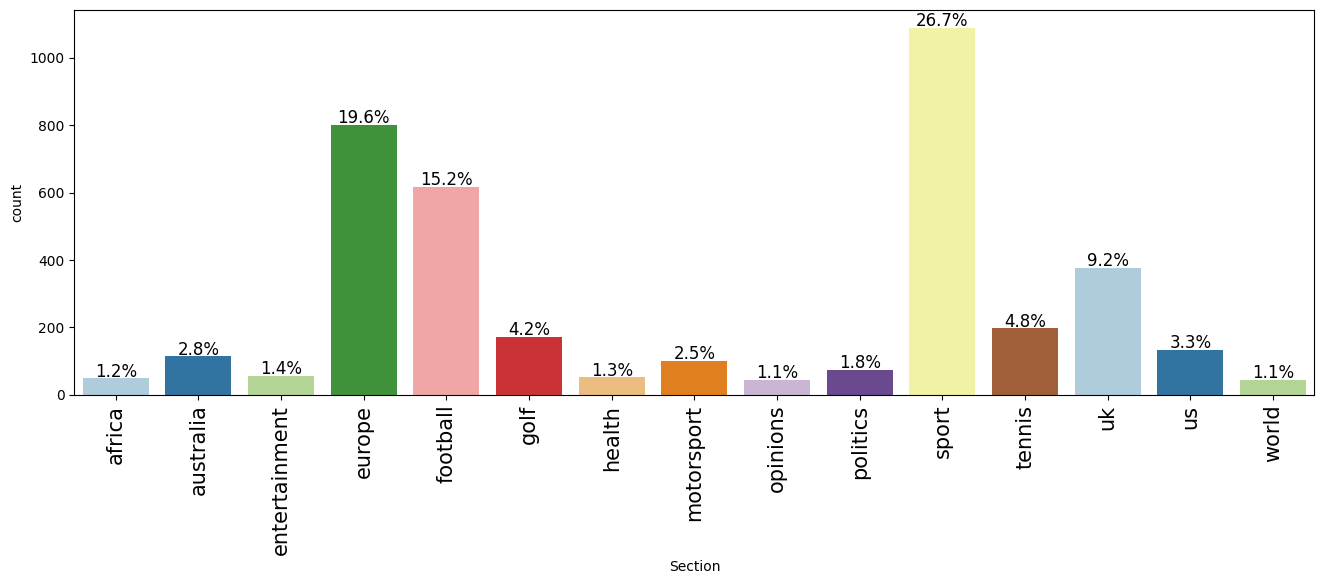

In [ ]:
labeled_barplot(data, "Section", perc=True, n = 15)

* The most common section articles in the data belong to are sports, europe, and football

#### Distribution of the year of publishing

In [ ]:
data['year'] = pd.to_datetime(data['Date published']).dt.year

<ipython-input-12-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


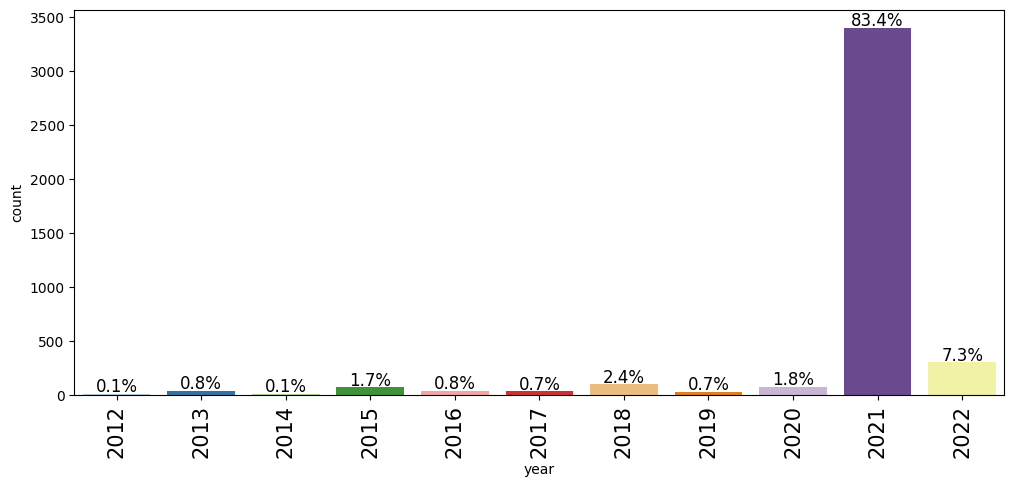

In [ ]:
labeled_barplot(data, "year", perc=True)

- Most of the articles are from the year 2021

## Data Preprocessing

In [ ]:
dataset = data.copy()

#### **Preprocessing the textual column**

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# preprocessing the textual column
dataset['Article_text_clean'] = dataset['Article text'].apply(preprocess_text)

#### **Splitting the dataset**

In [ ]:
# Creating dependent and independent variables
X = dataset['Article_text_clean']
y = dataset['Category']

In [ ]:
from sklearn.model_selection import train_test_split

# Initial split into training (80%) and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, X_valid.shape)

(3260,) (408,) (408,)


In [ ]:
print(y_train.shape, y_test.shape, y_valid.shape)

(3260,) (408,) (408,)


#### **Label Encoding**

Label Encoding is a method employed to transform categorical columns into numerical format, enabling their compatibility with machine learning models that exclusively operate on numerical data.
For example, consider a categorical column "Color" which has values 'Red,' 'Blue,' and 'Green.'
Using label encoding, we can represent these categories numerically:

Red   : 0

Blue  : 1

Green : 2

Here, we apply label encoding to "Category" column in our data.

In [ ]:
# Label Encoding
encoder = LabelEncoder()

# fitting the encoder to the training labels
y_train_enc = encoder.fit_transform(y_train)

# applying the encoder mapping from training labels to validation and test labels
y_valid_enc = encoder.transform(y_valid)
y_test_enc = encoder.transform(y_test)

#### **Tokenization**

In [ ]:
# loading and creating an instance of the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


- `do_lower_case` argument converts the input to lowercase when it is set to *True*

In [ ]:
# specifying the maximum length of the input
max_length = 512

In [ ]:
X_train_tokenized = tokenizer(
    X_train.values.tolist(),    # passing the data as a list to the tokenizer
    max_length=max_length,    # specifies the maximum length of the tokenized data
    padding='max_length',    # padding the data to the specified maximum length
    truncation=True,    # truncating the input if it is longer than the specified maximum length
    return_attention_mask=True,    # specifying to return attention masks
    return_tensors='tf',    # specifying to return the output as tensorflow tensors
)

In [ ]:
X_valid_tokenized = tokenizer(
    X_valid.values.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='tf',
)

In [ ]:
X_test_tokenized = tokenizer(
    X_test.values.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='tf',
)

#### **Creating tensorflow datasets**

Converting regular data into a batched tensorflow dataset helps in optimizing memory usage. We can do that in the following steps.

1. Convert the tokenized input into a dictionary
2. Zip the dictionary and target labels into a tensorflow dataset
3. Split the tensorflow dataset into batches

In [ ]:
# defining the size of the batches
batch_size = 8

# converting the tokenized input and the output into a batched tensorflow dataset for training
train_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_train_tokenized), y_train_enc)).batch(batch_size)

# converting the tokenized input and the output into a batched tensorflow dataset for validation
valid_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_valid_tokenized), y_valid_enc)).batch(batch_size)

# converting the tokenized input and the output into a batched tensorflow dataset for testing
test_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_test_tokenized), y_test_enc)).batch(batch_size)

## Model Building

### **BERT Model**

BERT, or Bidirectional Encoder Representations from Transformers, is a pre-trained natural language processing (NLP) model developed by Google. It belongs to the ***Transformer*** architecture, which was introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017.

BERT is designed to understand the context of words in a sentence by considering the entire sentence bidirectionally, rather than just in a left-to-right or right-to-left manner. This bidirectional approach allows BERT to capture complex contextual relationships and dependencies between words, making it highly effective for various NLP tasks.

### Loading the Model

In [ ]:
num_classes = y.nunique()
num_classes

6

###**TFBertForSequenceClassification**

TFBertForSequenceClassification is a class in the Hugging Face Transformers library that is specifically designed for fine-tuning BERT (Bidirectional Encoder Representations from Transformers) models for sequence classification tasks using TensorFlow. BERT is a pre-trained transformer-based language model developed by Google, and it has achieved state-of-the-art results in various natural language processing (NLP) tasks.

When using TFBertForSequenceClassification, you typically load a pre-trained BERT model (such as 'bert-base-uncased') and fine-tune it on your specific classification task by providing labeled training data. The model can then be used to make predictions on new sequences of text.


In [ ]:
# Model initialization using BERT for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# print the summary of the model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  4614      
                                                                 
Total params: 109486854 (417.66 MB)
Trainable params: 109486854 (417.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fine-tuning the model

In [ ]:
# setting the learning rate for the optimizer
learning_rate = 1e-5

# Setting the optimizer to Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# Specify the loss function for the model
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define evaluation metric(s) for the model
metric = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

**Class imbalance** occurs when the distribution of classes in the training data is not uniform, meaning some classes have significantly fewer examples than others. If left unaddressed, models trained on imbalanced datasets may be biased toward the majority class and perform poorly on minority classes.

By adjusting the class weights, we guide the model to give more emphasis to underrepresented classes. This can result in a more balanced and accurate model for sequence classification.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train_enc.shape[0]) / np.bincount(y_train_enc)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[encoder.transform(encoder.classes_)[i]] = cw[i]

**Epochs** refer to the number of times the entire training dataset is passed forward and backward through the neural network. Each pass through the entire dataset is considered one epoch.
The goal is to minimize the difference between the model's predictions and the actual target values. Choosing an appropriate number of training epochs is crucial for achieving good performance without overfitting or underfitting the model.
When fine-tuning a pre-trained BERT model for a specific task, it's common to use a smaller number of training epochs compared to training from scratch.

In [ ]:
# Number of training epochs
n_epochs = 3

bert_base_tuned = model.fit(train_tokenized_tf, epochs=n_epochs, validation_data=valid_tokenized_tf, class_weight=cw_dict)

Epoch 1/3
408/408 [==============================] - 452s 1000ms/step - loss: 6.8506 - accuracy: 0.7258 - val_loss: 0.4686 - val_accuracy: 0.8897
Epoch 2/3
408/408 [==============================] - 411s 1s/step - loss: 2.2147 - accuracy: 0.9077 - val_loss: 0.3154 - val_accuracy: 0.9020
Epoch 3/3
408/408 [==============================] - 407s 998ms/step - loss: 1.2500 - accuracy: 0.9328 - val_loss: 0.2555 - val_accuracy: 0.9191


In [ ]:
# Generate raw predictions on the validation dataset using the trained model
preds_raw_val = model.predict(valid_tokenized_tf)

# Extract predicted labels by finding the index with the highest probability for each example
preds_val = np.argmax(np.array(tf.nn.softmax(preds_raw_val.logits)), axis=1)

# Display the shape of the predicted labels array
preds_val.shape

51/51 [==============================] - 23s 342ms/step


(408,)

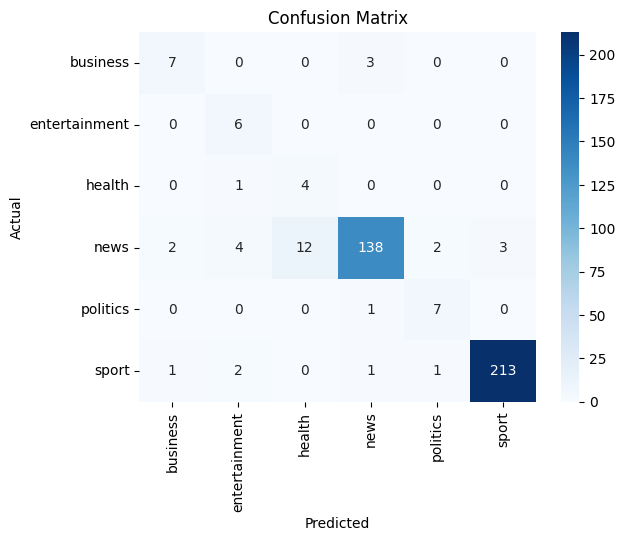

In [ ]:
# retrieving the labels from the tensorflow dataset
actual_val = np.concatenate([y for x, y in valid_tokenized_tf], axis=0)

# Creating confusion matrix
cnf_mt = confusion_matrix(actual_val, preds_val)

# Visualizing confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(actual_val, preds_val))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.46      1.00      0.63         6
           2       0.25      0.80      0.38         5
           3       0.97      0.86      0.91       161
           4       0.70      0.88      0.78         8
           5       0.99      0.98      0.98       218

    accuracy                           0.92       408
   macro avg       0.68      0.87      0.73       408
weighted avg       0.95      0.92      0.93       408



- The model achieved ~93% accuracy on the validation set

## Model Testing

In [ ]:
preds_raw_test = model.predict(test_tokenized_tf)
preds_test = np.argmax(np.array(tf.nn.softmax(preds_raw_test.logits)), axis=1)
preds_test.shape

51/51 [==============================] - 18s 352ms/step


(408,)

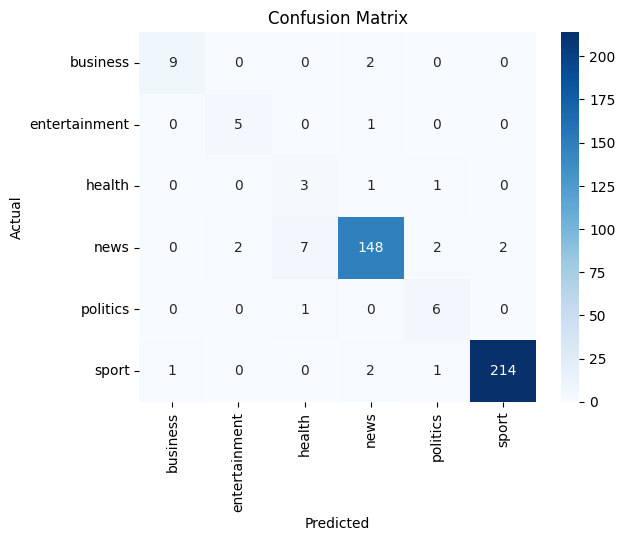

In [ ]:
actual_test = np.concatenate([y for x, y in test_tokenized_tf], axis=0)

cnf_mt = confusion_matrix(actual_test, preds_test)

labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report:')
print(classification_report(actual_test, preds_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.71      0.83      0.77         6
           2       0.27      0.60      0.37         5
           3       0.96      0.92      0.94       161
           4       0.60      0.86      0.71         7
           5       0.99      0.98      0.99       218

    accuracy                           0.94       408
   macro avg       0.74      0.83      0.77       408
weighted avg       0.96      0.94      0.95       408



- The model achieved ~95% accuracy on the test set

## Summary

- We fine-tuned a BERT model to classify news articles into different categories with an accuracy of 95% on the test set

- To further improve the model performance, especially on the minority categories (like entertainment, health, and politics articles), one caan collect more articles from these categories

___